## Import Libraries

In [253]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [306]:
df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Tuwaiqpro/Usecase-7/final_data.csv")

In [308]:
df.shape

(10754, 22)

In [310]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [313]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [315]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [78]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)  


Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_encoded', 'winger'],
      dtype='object')


In [317]:
correlation_matrix = df[numeric_columns].corr()  
print(correlation_matrix['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


In [365]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team']
numeric_features = ['height', 'appearance', 'goals','assists','red cards', 'yellow cards', 'minutes played', 'games_injured','days_injured']

In [367]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
Aston Villa                4
West Ham United            3
Manchester City            2
Chelsea FC                 2
Arsenal FC                 1
Name: count, Length: 374, dtype: int64


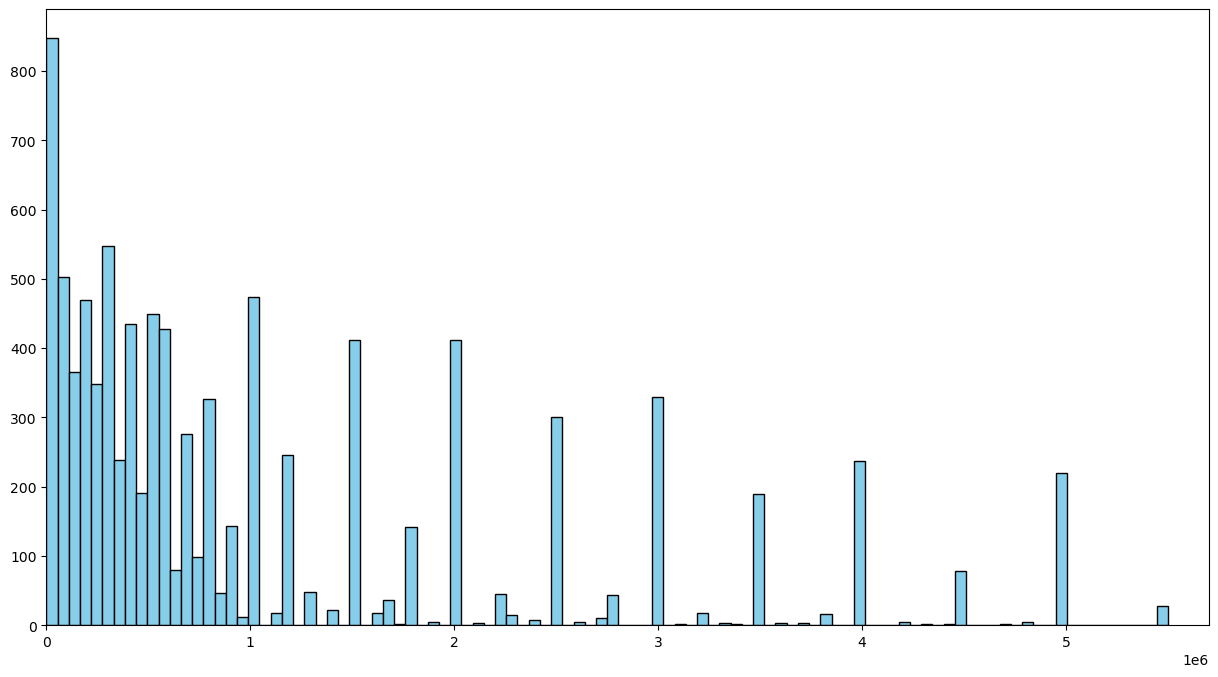

In [369]:
plt.figure(figsize=(15, 8))
plt.hist(df[df['current_value'] <= 5700000]['current_value'], bins=100, color='skyblue', edgecolor='black')
plt.xlim(0, 5700000)
plt.show()

In [371]:
df = df[df['current_value']<=5500000]

In [373]:
df.shape

(9203, 22)

In [329]:
max_appearance = df['appearance'].max()
print({max_appearance})

{105}


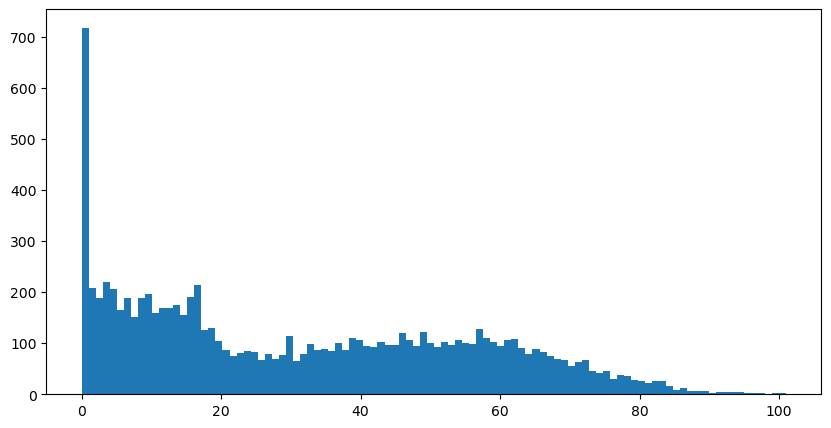

In [375]:
plt.figure(figsize=(10,5))
plt.hist(df[df['appearance']<=101]['appearance'], bins=100);

In [152]:
df = df[df['appearance']<=89]

In [377]:
df.shape

(9203, 22)

In [379]:
print(df.columns)


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


In [487]:

selected_columns = ['current_value', 'highest_value', 'appearance', 'minutes played','team']  # أضف الأعمدة التي تريدها


df_filtered = df[selected_columns]


print(df_filtered.shape)


(9203, 5)


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [383]:
df_filtered.head(2)

,current_value,highest_value,appearance,minutes played,team
1,1500000,22000000,15,1304,Manchester United
2,600000,6000000,4,292,Manchester United


In [385]:
categorical_features

['team']

In [387]:
print(df_filtered.columns)


Index(['current_value', 'highest_value', 'appearance', 'minutes played',
       'team'],
      dtype='object')


In [389]:
# one hot coding
df_filtered = pd.get_dummies(df_filtered, columns=categorical_features)

In [393]:
df_filtered.shape

(9203, 378)

In [395]:
df_filtered.head(2)

,current_value,highest_value,appearance,minutes played,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
1,1500000,22000000,15,1304,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,6000000,4,292,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [397]:
correlation = df_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.461213
appearance                   0.399269
minutes played               0.376217
team_Fenerbahce              0.068204
                               ...   
team_Swallows FC            -0.047973
team_Daejeon Hana Citizen   -0.048699
team_Al-Batin FC            -0.049160
team_Marumo Gallants FC     -0.050475
team_Royal AM FC            -0.050581
Name: current_value, Length: 378, dtype: float64


In [29]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Price']) > threshold]['Price'].index
selected_features

Index(['Year', 'Engine_Size', 'Mileage', 'Price', 'Type_Land Cruiser',
       'Type_Range Rover', 'Make_Hyundai', 'Make_Land Rover', 'Make_Lexus',
       'Make_Mercedes', 'Options_Full', 'Options_Standard'],
      dtype='object')

In [30]:
selected_features = ['Year', 'Engine_Size', 'Mileage',
                     'Price', 
                     'Make_Hyundai', 'Make_Land Rover', 'Make_Lexus',
                     'Make_Mercedes', 'Origin_Gulf Arabic', 'Options_Full',
                     'Options_Standard']

In [31]:
df = df[selected_features]
df.head()

,Year,Engine_Size,Mileage,Price,Make_Hyundai,Make_Land Rover,Make_Lexus,Make_Mercedes,Origin_Gulf Arabic,Options_Full,Options_Standard
1,2014,8.0,80000,120000,False,False,False,False,False,True,False
2,2015,5.0,140000,260000,False,True,False,False,True,True,False
3,2015,2.4,220000,42000,False,False,False,False,False,False,False
5,2019,2.0,25000,58000,False,False,False,False,False,False,False
6,2012,4.8,189000,85000,False,False,False,False,False,True,False


#### 4. Prepare train and test data

In [421]:

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [423]:
X = df[['highest_value', 'appearance', 'minutes played']]
y = df['current_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [425]:
X.shape

(9203, 3)

## Buliding the Model

In [428]:
model = LinearRegression()

In [430]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [432]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [434]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [485]:
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'R² Score: {score}')

R² Score: 0.30198063760180316


## Train the Model

In [439]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [441]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [444]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,481804.570080
appearance,310797.754725
minutes played,81844.828866


In [446]:
print(model.intercept_) 

1107506.1124694378


In [448]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'Lasso' object has no attribute 'coef_'

## Evaluating the Model 

1. Mean Square Error

In [450]:
y_base = [y_train.mean()] * len(y_test)

In [452]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 1618480313694.0337


In [454]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 1082218727103.6083
Mean Squared Error for testing: 1129676204838.6948


2. Mean Absolute Error

In [457]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 972344.7578851188


In [459]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 742915.8720159227
Mean Absolute Error for testing: 764104.0811487959


3. Root Mean Squared Error

In [462]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 986.0754321476217


In [464]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 1040297.4224247641
Root Mean Squared Error for testing: 1062862.269929032


4. R Square

In [467]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.3019471992103393
R Square for testing: 0.30198063760180316


#### Predictions vs. Real Values

In [476]:
predictions = model.predict(X_test_scaled)
#predictions

In [478]:
Real_Values = np.array(y_test)
#Real_Values

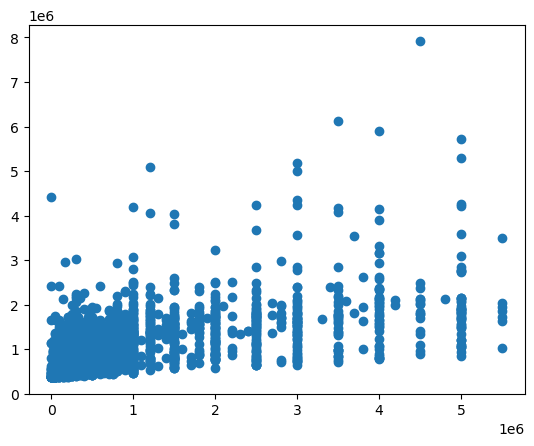

In [480]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

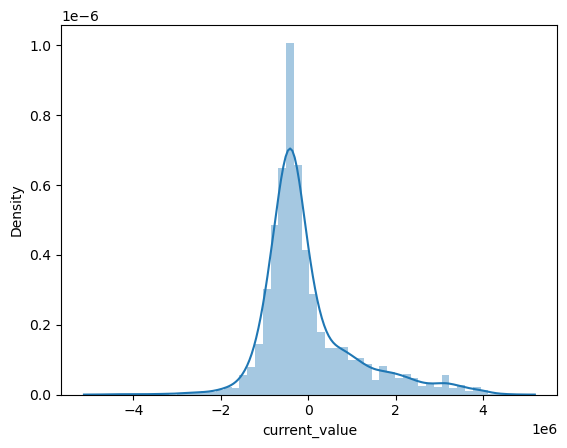

In [483]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution